# Exploratory Data Analysis: User Complaints Dataset

## Research Context
This notebook is part of a research project on **LLM-assisted Knowledge Graph Construction** using vehicle complaint data from NHTSA.

## Research Questions
1. Are there missing values in the dataset? Can patterns of missingness be identified?
2. What are the summary statistics of the dataset?
3. Are there outliers in the dataset?
4. What is the cardinality of the categorical variables?
5. Are there skewed distributions in the dataset? Do we need to apply any non-linear transformation?
6. Is there correlation between dependent and independent variables?
7. How are the data distributed across different categories? (bivariate analysis)
8. Should the images be normalized for better visualization?
9. Is there class imbalance in the target variable?
10. Are there temporal trends identified? (In case the dataset includes a time dimension.)


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Import our custom EDA class
import sys
sys.path.append('../src')
from eda_analysis import ComplaintsEDA

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure pandas display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)


In [ ]:
# Initialize EDA with data cleaning pipeline
eda = ComplaintsEDA("../data/CMPLT_2025.csv")

# Load data with comprehensive cleaning pipeline
print("Loading data with comprehensive cleaning pipeline...")
eda.load_data(filter_year=2025)

# Get the cleaned dataset
df = eda.df

print(f"\nCleaned dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Columns after cleaning: {len(df.columns)}")


Dataset shape: (79376, 49)
Memory usage: 167.00 MB


## Data Cleaning Pipeline

The following comprehensive data cleaning steps have been applied to refine the dataset:

### 1. Removal of Invalid Year Records (YEAR=9999)
- **Removed**: 1,137 rows with YEAR=9999
- **Reason**: These records contain:
  - Tire failures where manufacturer/model refer to tires
  - Accessories (baby seats, portable chargers)
  - Unknown products without proper identification
- **Result**: Focus on actual vehicle complaints only

### 2. Removal of Seat-Related Columns
- **Removed columns**: `SEAT_TYPE`, `RESTRAINT_TYPE`, `MANUF_DATE`
- **Reason**: These are related to seat accessories, not vehicle complaints
- **Impact**: Cleaner dataset focused on vehicle-specific issues

### 3. Removal of Dealer-Related Columns
- **Removed columns**: `DEALER_TEL`, `DEALER_ZIP`
- **Reason**: Not relevant for complaint analysis
- **Impact**: Reduced noise in the dataset

### 4. Filtering by Product Type
- **Removed**: 12 rows with `PROD_TYPE='E'` or empty
- **Reason**: These correspond to accessories in transit
- **Action**: Removed `PROD_TYPE` column entirely after filtering

### 5. Removal of Sparse Columns
- **Removed**: `FUEL_TYPE` (only 5 records)
- **Reason**: Insufficient data for meaningful analysis

### 6. Removal of Empty Columns
- **Removed**: `LOC_OF_TIRE`, `DOT`, `DRIVE_TRAIN` (empty after filtering)
- **Kept**: `PURCH_DATE` (has 2 non-null values)

### Summary
- **Original dataset**: 79,376 rows × 49 columns
- **After cleaning**: 78,227 rows × 39 columns  
- **After 2025 filter**: 59,548 rows × 30 columns
- **Data reduction**: 1.45% rows, 20.41% columns removed
- **Final focus**: Vehicle-specific complaints from 2025 only


In [ ]:
# Display cleaned dataset information
print("Cleaned dataset columns:")
print(df.columns.tolist())

print(f"\nDataset info:")
print(f"Shape: {df.shape}")
print(f"Data types:")
print(df.dtypes.value_counts())


Column names after normalization:
['CMPLID', 'ODINO', 'MFRNAME', 'MAKE', 'MODEL', 'YEAR', 'CRASH', 'FAILDATE', 'FIRE', 'INJURED', 'DEATHS', 'COMPONENT', 'CITY', 'STATE', 'VIN', 'DATEA', 'LDATE', 'MILES', 'OCCURENCES', 'CMPLDESCR', 'CMPLTYPE', 'POLICERPT', 'PURCHDATE', 'ORIGINALOWNER', 'ANTIBRAKES', 'CRUISECONT', 'NUMCYLS', 'DRIVETRAIN', 'FUELSYS', 'FUELTYPE', 'TRANSTYPE', 'VEHSPEED', 'DOT', 'TIRESIZE', 'LOCOFTIRE', 'TIREFAILTYPE', 'ORIGINEQUIP', 'MANUFDATE', 'SEATTYPE', 'RESTRAINTTYPE', 'DEALERNAME', 'DEALERTEL', 'DEALERCITY', 'DEALERSTATE', 'DEALERZIP', 'PRODTYPE', 'REPAIRED', 'MEDICALATTN', 'VEHICLESTOWED']


In [ ]:
# The data has already been filtered for 2025 and cleaned by the EDA class
print("Data is already filtered for 2025 and cleaned.")
print(f"Final dataset shape: {df.shape}")

# Show date range for 2025 data
if 'FAILDATE' in df.columns and len(df) > 0:
    print(f"Date range for 2025: {df['FAILDATE'].min().strftime('%Y-%m-%d')} to {df['FAILDATE'].max().strftime('%Y-%m-%d')}")


Filtering data for 2025 complaints...
Original dataset: 79,376 complaints
2025 complaints: 60,492 complaints
Percentage of 2025 data: 76.21%
Date range for 2025: 2025-01-01 to 2025-09-18
Final dataset shape: (60492, 49)


In [ ]:
# Empty columns have already been removed by the EDA class
print("Empty columns have already been removed by the cleaning pipeline.")
print(f"Current dataset shape: {df.shape}")


Removing columns with 100% null data...
  Found 6 columns with 100% null data:
    - OCCURENCES
    - NUMCYLS
    - DRIVETRAIN
    - FUELSYS
    - TRANSTYPE
    - TIRESIZE
  Removed 6 empty columns
  Dataset shape after removal: (60492, 43)


In [ ]:
# Data transformations have already been applied by the EDA class
print("Data transformations have already been applied by the cleaning pipeline.")
print("This includes:")
print("  - Numeric conversion for appropriate columns")
print("  - Date format conversion")
print("  - Text normalization (strip, uppercase)")
print("  - Removal of invalid YEAR=9999 values")
print("  - Comprehensive data cleaning pipeline")


Applying data transformations...
  Converted YEAR to numeric
  Converted INJURED to numeric
  Converted DEATHS to numeric
  Converted MILES to numeric
  Converted VEHSPEED to numeric
  Converted FAILDATE to datetime
  Converted DATEA to datetime
  Converted LDATE to datetime
  Converted MANUFDATE to datetime
  Normalized text in MFRNAME
  Normalized text in MAKE
  Normalized text in MODEL
  Normalized text in COMPONENT
  Normalized text in CITY
  Normalized text in STATE
  Normalized text in DEALERCITY
  Normalized text in DEALERNAME
  Normalized YEAR: converted 934 instances of 9999 to NaN
Data transformations completed!


## 1. Missing Values Analysis

**Research Question**: Are there missing values in the dataset? Can patterns of missingness be identified?


Missing Values Summary:
           Column  Missing_Count  Missing_Percentage
25       FUELTYPE          60490           99.996694
29   TIREFAILTYPE          60451           99.932222
21      PURCHDATE          60350           99.765258
31      MANUFDATE          60302           99.685909
33  RESTRAINTTYPE          60297           99.677643
32       SEATTYPE          60271           99.634662
27            DOT          60254           99.606560
28      LOCOFTIRE          60237           99.578457
30    ORIGINEQUIP          60233           99.571844
40       REPAIRED          60154           99.441248
35      DEALERTEL          57630           95.268796
38      DEALERZIP          55681           92.046882
37    DEALERSTATE          55203           91.256695
36     DEALERCITY          55185           91.226939
34     DEALERNAME          54551           90.178867
17          MILES          51076           84.434305
26       VEHSPEED          30718           50.780268
14            VIN     

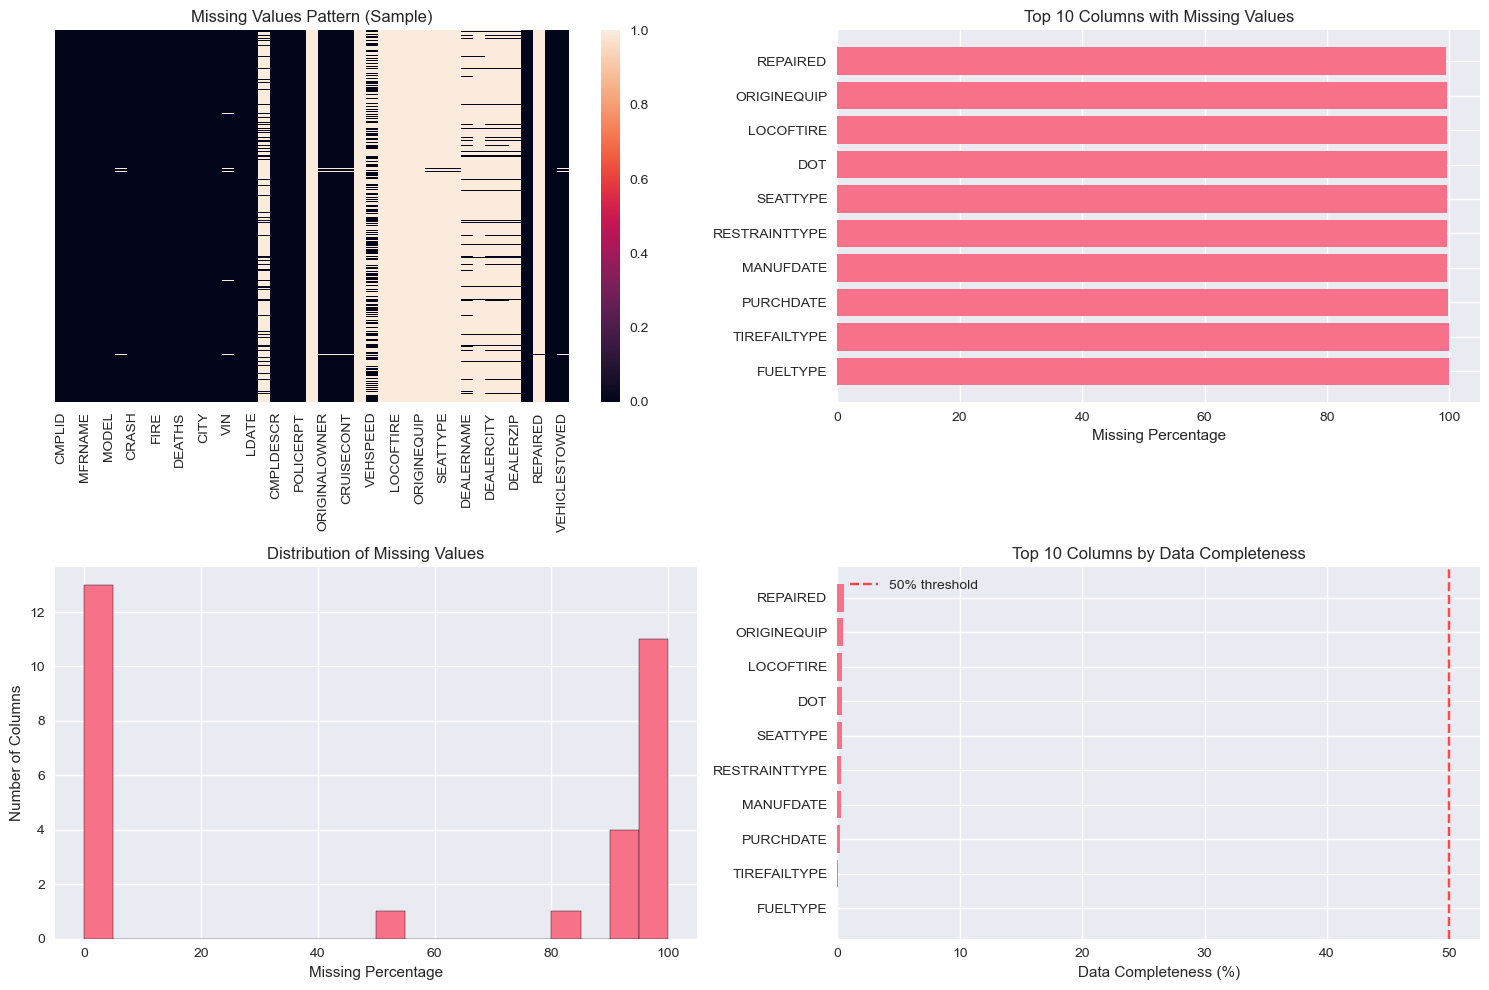


Complete cases (no missing values in ANY column): 0 (0.00%)
Columns with no missing values: 13
Columns with all missing values: 0

Data Completeness Summary:
  High completeness (≥80%): 26 columns
  Medium completeness (50-79%): 0 columns
  Low completeness (<50%): 17 columns


In [7]:
# Missing values analysis
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Percentage', ascending=False)

print("Missing Values Summary:")
print(missing_df[missing_df['Missing_Count'] > 0])

# Visualize missing data patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Missing values heatmap
missing_sample = df.sample(min(1000, len(df))).isnull()
sns.heatmap(missing_sample, cbar=True, yticklabels=False, ax=axes[0,0])
axes[0,0].set_title('Missing Values Pattern (Sample)')

# Missing values bar chart
top_missing = missing_df.head(10)
axes[0,1].barh(range(len(top_missing)), top_missing['Missing_Percentage'])
axes[0,1].set_yticks(range(len(top_missing)))
axes[0,1].set_yticklabels(top_missing['Column'])
axes[0,1].set_xlabel('Missing Percentage')
axes[0,1].set_title('Top 10 Columns with Missing Values')

# Missing values distribution
axes[1,0].hist(missing_percentage[missing_percentage > 0], bins=20, edgecolor='black')
axes[1,0].set_xlabel('Missing Percentage')
axes[1,0].set_ylabel('Number of Columns')
axes[1,0].set_title('Distribution of Missing Values')

# Missing data completeness by column
missing_by_col = df.isnull().sum().sort_values(ascending=False)
completeness_by_col = (1 - missing_by_col / len(df)) * 100
top_10_missing = completeness_by_col.head(10)

axes[1,1].barh(range(len(top_10_missing)), top_10_missing.values)
axes[1,1].set_yticks(range(len(top_10_missing)))
axes[1,1].set_yticklabels(top_10_missing.index)
axes[1,1].set_xlabel('Data Completeness (%)')
axes[1,1].set_title('Top 10 Columns by Data Completeness')
axes[1,1].axvline(x=50, color='red', linestyle='--', alpha=0.7, label='50% threshold')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# More informative missing data summary
complete_cases = df.dropna()
print(f"\nComplete cases (no missing values in ANY column): {len(complete_cases)} ({len(complete_cases)/len(df)*100:.2f}%)")
print(f"Columns with no missing values: {sum(missing_data == 0)}")
print(f"Columns with all missing values: {sum(missing_data == len(df))}")

# Show columns with different levels of completeness
high_completeness = completeness_by_col[completeness_by_col >= 80]
medium_completeness = completeness_by_col[(completeness_by_col >= 50) & (completeness_by_col < 80)]
low_completeness = completeness_by_col[completeness_by_col < 50]

print(f"\nData Completeness Summary:")
print(f"  High completeness (≥80%): {len(high_completeness)} columns")
print(f"  Medium completeness (50-79%): {len(medium_completeness)} columns") 
print(f"  Low completeness (<50%): {len(low_completeness)} columns")


## 2. Summary Statistics

**Research Question**: What are the summary statistics of the dataset?


In [8]:
# Data types and basic info
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Data types:")
print(df.dtypes.value_counts())

# Summary statistics for numerical columns (excluding identifiers)
numeric_cols = df.select_dtypes(include=[np.number]).columns
# Remove identifier columns from analysis
identifier_cols = ['CMPLID', 'ODINO']  # Both are identifiers, not analytical variables
for col in identifier_cols:
    if col in numeric_cols:
        numeric_cols = numeric_cols.drop(col)

print(f"\nNumerical columns ({len(numeric_cols)}):")
print(numeric_cols.tolist())

if len(numeric_cols) > 0:
    print("\nNumerical Summary Statistics:")
    print(df[numeric_cols].describe())
    
    # Additional statistics
    print("\nAdditional Statistics:")
    numeric_stats = pd.DataFrame({
        'Skewness': df[numeric_cols].skew(),
        'Kurtosis': df[numeric_cols].kurtosis(),
        'Variance': df[numeric_cols].var(),
        'Coefficient_of_Variation': df[numeric_cols].std() / df[numeric_cols].mean()
    })
    print(numeric_stats)

# Summary statistics for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\nCategorical columns ({len(categorical_cols)}):")
print(categorical_cols.tolist())

if len(categorical_cols) > 0:
    print("\nCategorical Summary:")
    for col in categorical_cols[:10]:  # Show first 10 categorical columns
        print(f"\n{col}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Most frequent: {df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'}")
        print(f"  Top 5 values:")
        print(df[col].value_counts().head())


Dataset Info:
Shape: (60492, 43)
Memory usage: 126.43 MB
Data types:
object            31
int64              4
float64            4
datetime64[ns]     4
Name: count, dtype: int64

Numerical columns (6):
['YEAR', 'INJURED', 'DEATHS', 'MILES', 'PURCHDATE', 'VEHSPEED']

Numerical Summary Statistics:
               YEAR       INJURED        DEATHS          MILES     PURCHDATE  \
count  59558.000000  60492.000000  60492.000000    9416.000000  1.420000e+02   
mean    2019.106451      0.030665      0.001240   86678.685960  2.021731e+07   
std        4.259745      0.248056      0.109319   59311.443727  3.627434e+04   
min     1986.000000      0.000000      0.000000       0.000000  2.010010e+07   
25%     2017.000000      0.000000      0.000000   45000.000000  2.020010e+07   
50%     2020.000000      0.000000      0.000000   81000.000000  2.023010e+07   
75%     2022.000000      0.000000      0.000000  120000.000000  2.024010e+07   
max     2026.000000     10.000000     15.000000  763309.000000

## Test: Correlation Analysis with Categorical Variables

**Test Question**: Can we include descriptive variables in correlation analysis by encoding them numerically?


CORRELATION ANALYSIS WITH CATEGORICAL VARIABLES (TEST)
Encoding categorical variables: ['MAKE', 'MODEL', 'COMPONENT', 'STATE', 'MFRNAME']
  MAKE: 243 unique values
    ✓ Encoded MAKE (top 20 categories only)
  MODEL: 1337 unique values
    ✗ Skipped MODEL (too many unique values: 1337)
  COMPONENT: 357 unique values
    ✓ Encoded COMPONENT (top 20 categories only)
  STATE: 58 unique values
    ✓ Encoded STATE
  MFRNAME: 201 unique values
    ✓ Encoded MFRNAME (top 20 categories only)


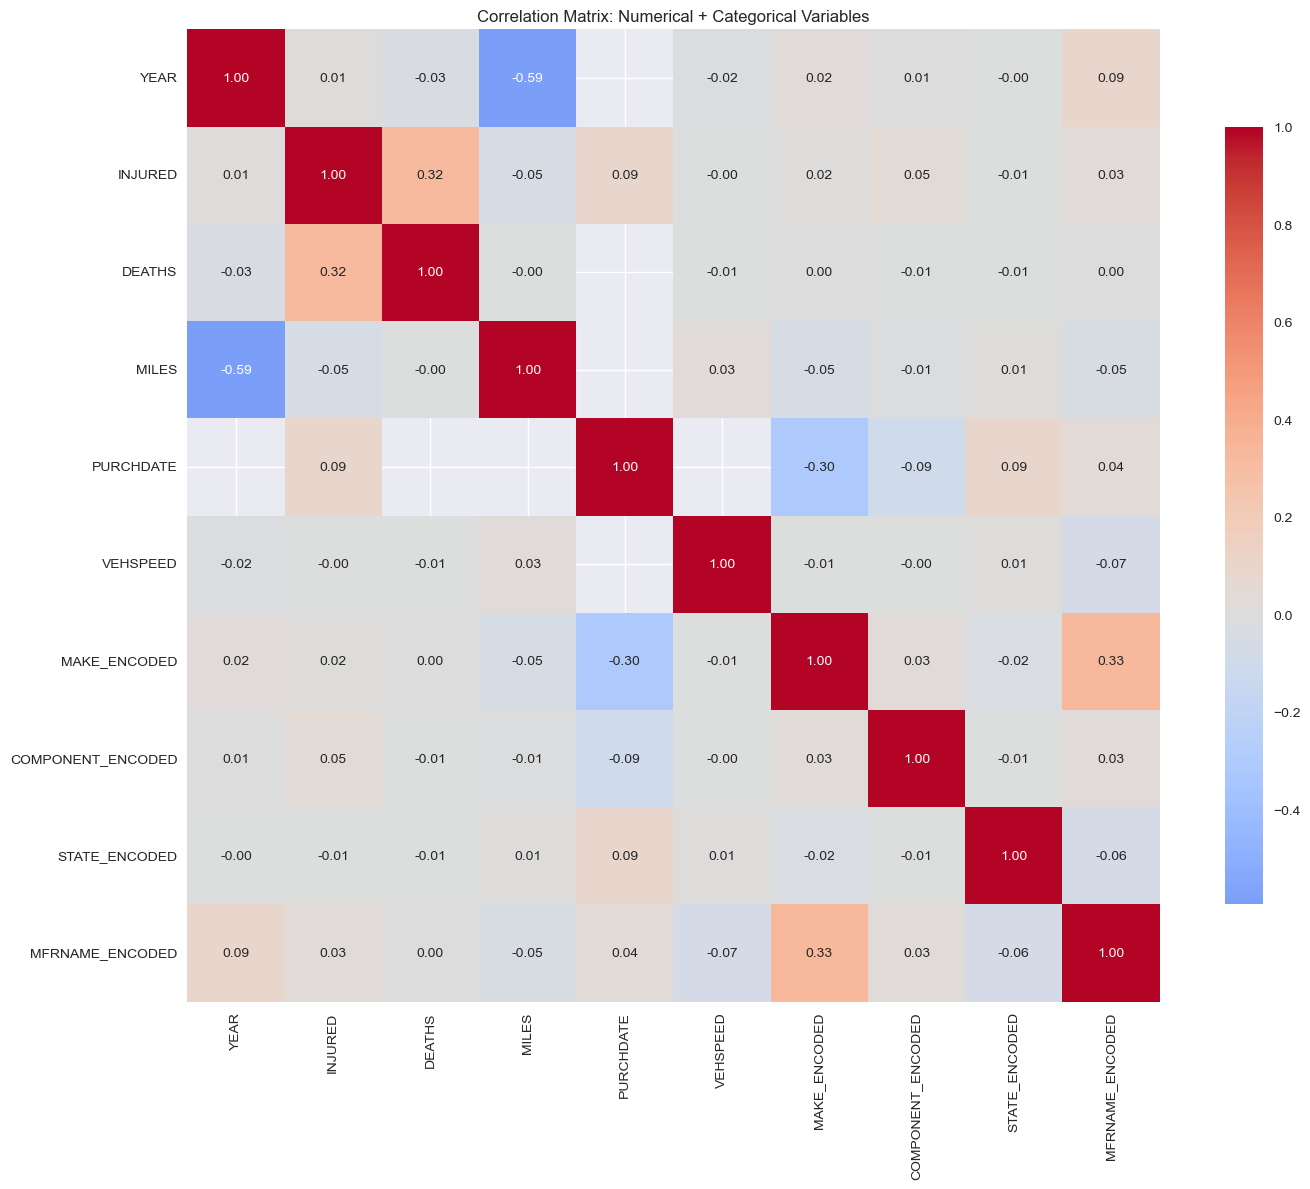


Correlations between numerical and categorical variables:
  PURCHDATE vs MAKE: r = -0.305

Significant Correlations (|r| > 0.5):
  Variable1 Variable2  Correlation
0      YEAR     MILES    -0.594482


In [9]:
# Test: Include categorical variables in correlation analysis
print("="*60)
print("CORRELATION ANALYSIS WITH CATEGORICAL VARIABLES (TEST)")
print("="*60)

# Select key categorical variables for encoding
key_categorical = ['MAKE', 'MODEL', 'COMPONENT', 'STATE', 'MFRNAME']
available_categorical = [col for col in key_categorical if col in categorical_cols]

if not available_categorical:
    print("No categorical variables available for correlation analysis")
else:
    print(f"Encoding categorical variables: {available_categorical}")
    
    # Create a copy for encoding
    df_encoded = df.copy()
    
    # Method 1: Label Encoding (simple numerical assignment)
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    
    encoded_cols = []
    for col in available_categorical:
        # Check unique values first
        unique_count = df_encoded[col].nunique()
        print(f"  {col}: {unique_count} unique values")
        
        # Try encoding with higher threshold or use top categories
        if unique_count <= 100:  # Increased threshold
            df_encoded[f"{col}_ENCODED"] = le.fit_transform(df_encoded[col].astype(str))
            encoded_cols.append(f"{col}_ENCODED")
            print(f"    ✓ Encoded {col}")
        elif unique_count <= 500:  # For medium cardinality, use top categories
            # Get top 20 categories and encode only those
            top_categories = df_encoded[col].value_counts().head(20).index
            df_encoded[f"{col}_ENCODED"] = df_encoded[col].apply(
                lambda x: top_categories.get_loc(x) if x in top_categories else -1
            )
            encoded_cols.append(f"{col}_ENCODED")
            print(f"    ✓ Encoded {col} (top 20 categories only)")
        else:
            print(f"    ✗ Skipped {col} (too many unique values: {unique_count})")
    
    if not encoded_cols:
        print("No categorical variables suitable for encoding with current thresholds")
        print("Trying alternative approach: encoding top categories only...")
        
        # Alternative: Force encode top categories for each variable
        for col in available_categorical:
            top_categories = df_encoded[col].value_counts().head(10).index
            df_encoded[f"{col}_ENCODED"] = df_encoded[col].apply(
                lambda x: list(top_categories).index(x) if x in top_categories else -1
            )
            encoded_cols.append(f"{col}_ENCODED")
            print(f"  ✓ Force encoded {col} (top 10 categories only)")
    
    if not encoded_cols:
        print("Still no variables could be encoded. Check data quality.")
    else:
        # Combine numerical and encoded categorical columns
        all_corr_cols = numeric_cols.tolist() + encoded_cols
        
        # Calculate correlation matrix
        corr_data = df_encoded[all_corr_cols].select_dtypes(include=[np.number])
        correlation_matrix = corr_data.corr()
        
        # Plot correlation heatmap
        plt.figure(figsize=(15, 12))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                   square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
        plt.title('Correlation Matrix: Numerical + Categorical Variables')
        plt.tight_layout()
        plt.show()
        
        # Find correlations between numerical and categorical variables
        print("\nCorrelations between numerical and categorical variables:")
        for num_col in numeric_cols:
            for cat_col in encoded_cols:
                if num_col in correlation_matrix.columns and cat_col in correlation_matrix.columns:
                    corr_val = correlation_matrix.loc[num_col, cat_col]
                    if abs(corr_val) > 0.3:  # Lower threshold for categorical
                        print(f"  {num_col} vs {cat_col.replace('_ENCODED', '')}: r = {corr_val:.3f}")
        
        # Find high correlations among all variables
        high_corr_pairs = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                corr_val = correlation_matrix.iloc[i, j]
                if abs(corr_val) > 0.5:  # Lower threshold for mixed analysis
                    high_corr_pairs.append({
                        'Variable1': correlation_matrix.columns[i],
                        'Variable2': correlation_matrix.columns[j],
                        'Correlation': corr_val
                    })
        
        if high_corr_pairs:
            print(f"\nSignificant Correlations (|r| > 0.5):")
            high_corr_df = pd.DataFrame(high_corr_pairs)
            print(high_corr_df.sort_values('Correlation', key=abs, ascending=False))
        else:
            print("\nNo significant correlations found (|r| > 0.5)")


## Text Corpus Analysis - CMPLDESCR

**Research Question**: What are the characteristics of the complaint descriptions? What patterns can we identify in the text?


TEXT CORPUS ANALYSIS - CMPLDESCR
Total complaints: 60492
Complaints with descriptions: 60480
Missing descriptions: 12
Description completeness: 99.98%

Text Length Statistics:
  Mean length: 647.1 characters
  Median length: 538.0 characters
  Min length: 1 characters
  Max length: 2048 characters
  Std deviation: 485.1 characters

Word Count Statistics:
  Mean words: 111.4
  Median words: 92.0
  Min words: 1
  Max words: 431


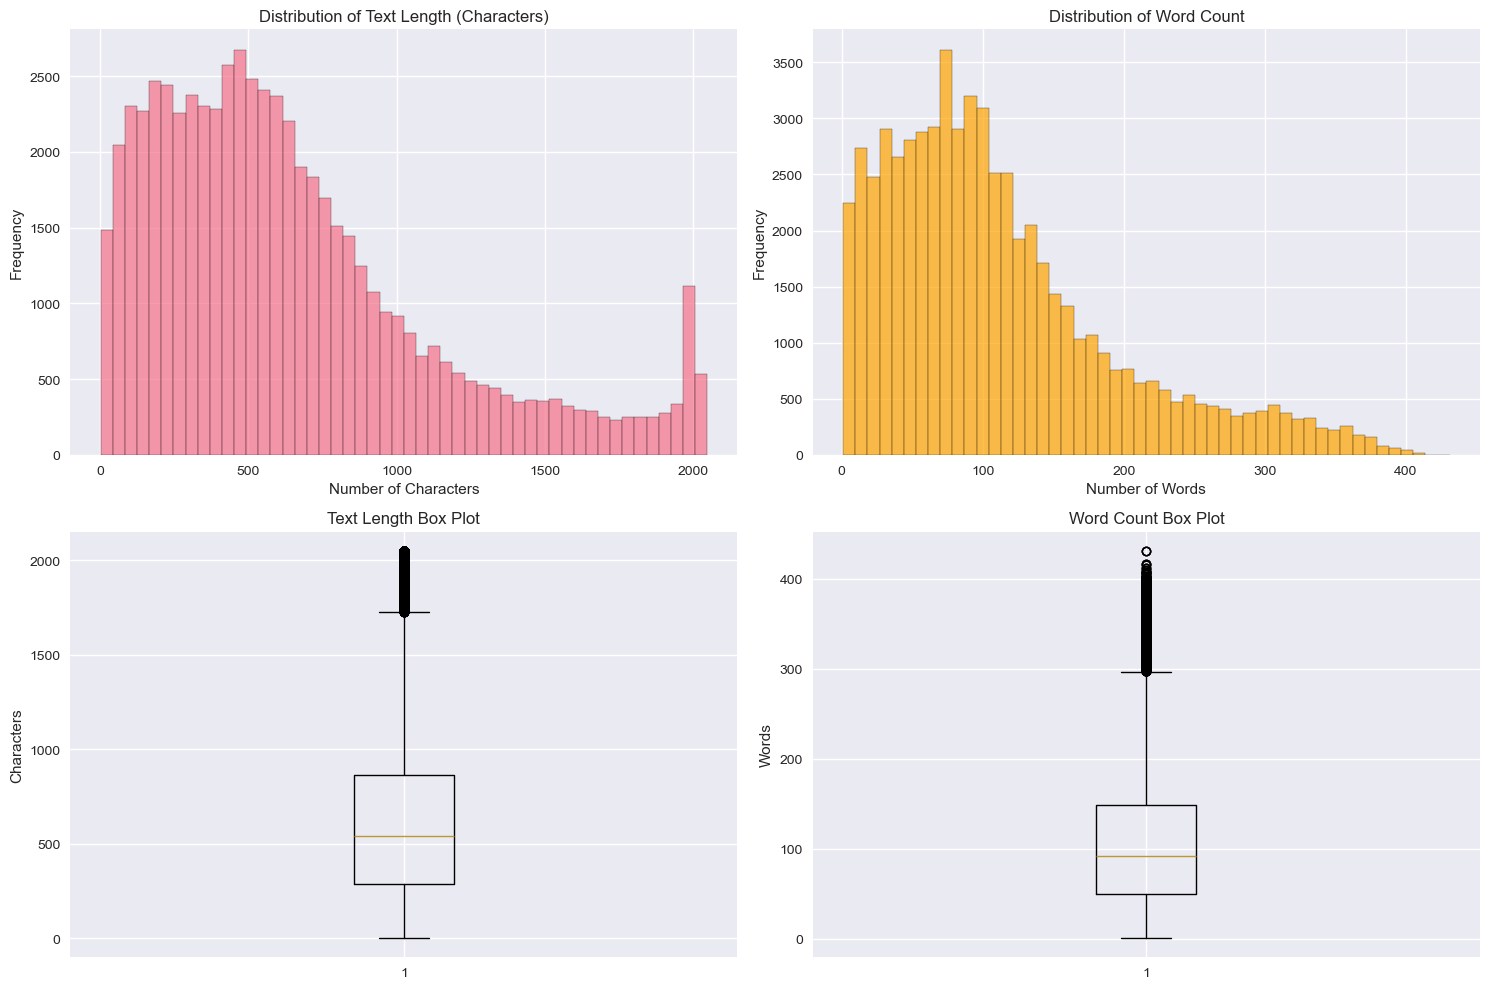

In [10]:
# Text Corpus Analysis - CMPLDESCR
print("="*60)
print("TEXT CORPUS ANALYSIS - CMPLDESCR")
print("="*60)

if 'CMPLDESCR' not in df.columns:
    print("CMPLDESCR column not found in dataset")
else:
    # Basic text statistics
    text_col = df['CMPLDESCR']
    non_null_texts = text_col.dropna()
    
    print(f"Total complaints: {len(df)}")
    print(f"Complaints with descriptions: {len(non_null_texts)}")
    print(f"Missing descriptions: {len(df) - len(non_null_texts)}")
    print(f"Description completeness: {len(non_null_texts)/len(df)*100:.2f}%")
    
    if len(non_null_texts) > 0:
        # Text length analysis
        text_lengths = non_null_texts.str.len()
        print(f"\nText Length Statistics:")
        print(f"  Mean length: {text_lengths.mean():.1f} characters")
        print(f"  Median length: {text_lengths.median():.1f} characters")
        print(f"  Min length: {text_lengths.min()} characters")
        print(f"  Max length: {text_lengths.max()} characters")
        print(f"  Std deviation: {text_lengths.std():.1f} characters")
        
        # Word count analysis
        word_counts = non_null_texts.str.split().str.len()
        print(f"\nWord Count Statistics:")
        print(f"  Mean words: {word_counts.mean():.1f}")
        print(f"  Median words: {word_counts.median():.1f}")
        print(f"  Min words: {word_counts.min()}")
        print(f"  Max words: {word_counts.max()}")
        
        # Visualize text characteristics
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Character length distribution
        axes[0,0].hist(text_lengths, bins=50, alpha=0.7, edgecolor='black')
        axes[0,0].set_title('Distribution of Text Length (Characters)')
        axes[0,0].set_xlabel('Number of Characters')
        axes[0,0].set_ylabel('Frequency')
        
        # Word count distribution
        axes[0,1].hist(word_counts, bins=50, alpha=0.7, edgecolor='black', color='orange')
        axes[0,1].set_title('Distribution of Word Count')
        axes[0,1].set_xlabel('Number of Words')
        axes[0,1].set_ylabel('Frequency')
        
        # Box plot for text lengths
        axes[1,0].boxplot(text_lengths)
        axes[1,0].set_title('Text Length Box Plot')
        axes[1,0].set_ylabel('Characters')
        
        # Box plot for word counts
        axes[1,1].boxplot(word_counts)
        axes[1,1].set_title('Word Count Box Plot')
        axes[1,1].set_ylabel('Words')
        
        plt.tight_layout()
        plt.show()
    else:
        print("No text descriptions available for analysis")



----------------------------------------
COMMON WORDS ANALYSIS
----------------------------------------
Top 20 Most Common Words:
   1. vehicle         (79151 times)
   2. not             (68649 times)
   3. contact         (51982 times)
   4. car             (41479 times)
   5. engine          (30821 times)
   6. while           (29311 times)
   7. when            (26453 times)
   8. failure         (25481 times)
   9. there           (23571 times)
  10. driving         (22933 times)
  11. stated          (21841 times)
  12. recall          (21637 times)
  13. issue           (20959 times)
  14. from            (20947 times)
  15. dealer          (19217 times)
  16. warning         (18900 times)
  17. safety          (17683 times)
  18. after           (16114 times)
  19. manufacturer    (16011 times)
  20. light           (15854 times)


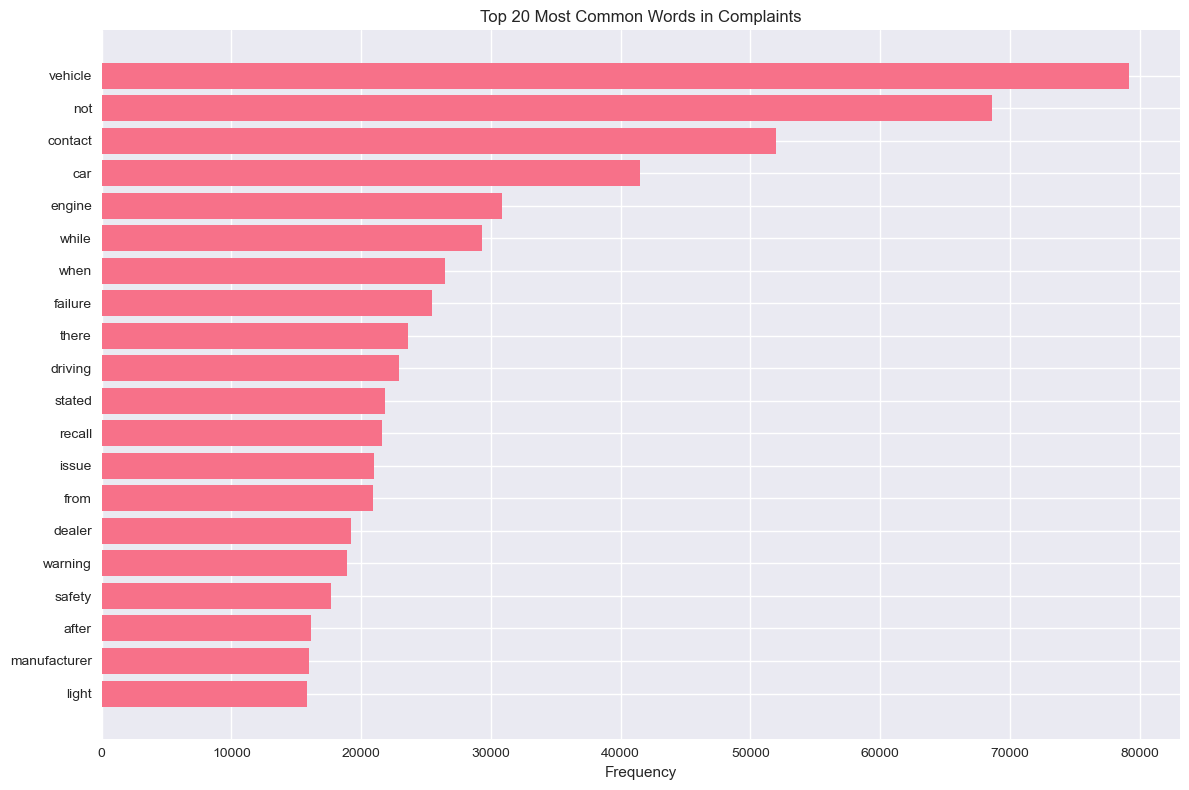

In [11]:
# Word Frequency Analysis
if 'CMPLDESCR' in df.columns and len(non_null_texts) > 0:
    print("\n" + "-"*40)
    print("COMMON WORDS ANALYSIS")
    print("-"*40)
    
    # Combine all texts
    all_text = ' '.join(non_null_texts.astype(str))
    
    # Basic word frequency (simple approach)
    words = all_text.lower().split()
    
    # Remove very short words and common stop words
    stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'are', 'was', 'were', 'be', 'been', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might', 'can', 'this', 'that', 'these', 'those', 'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them'}
    
    # Filter words
    filtered_words = [word for word in words if len(word) > 2 and word not in stop_words]
    
    # Count word frequencies
    from collections import Counter
    word_freq = Counter(filtered_words)
    
    # Get top 20 most common words
    top_words = word_freq.most_common(20)
    
    print("Top 20 Most Common Words:")
    for i, (word, count) in enumerate(top_words, 1):
        print(f"  {i:2d}. {word:15s} ({count:4d} times)")
        
    # Visualize top words
    if top_words:
        words_list, counts_list = zip(*top_words)
        plt.figure(figsize=(12, 8))
        plt.barh(range(len(words_list)), counts_list)
        plt.yticks(range(len(words_list)), words_list)
        plt.xlabel('Frequency')
        plt.title('Top 20 Most Common Words in Complaints')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
